In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import datasets
dataset = pd.read_csv('suicide_rate.csv')
X = pd.DataFrame(dataset.iloc[:, 8:])
y = dataset.iloc[:, 1].values

Text(0.5, 1.0, 'Suicide Rate 1990 - 2019')

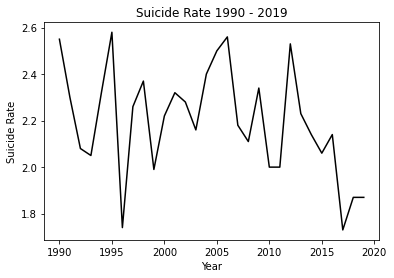

In [184]:
plt.plot(dataset["Year"],dataset["Suicide_Rate"],color='black')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate 1990 - 2019')

In [60]:
x_axis_labels = ["Rainy Days","Bright Sunshine (hr)","Marriage Rate","Visual Arts Displays","Mobile Phone Sub","Divorce Rate","Library Loans","Unemployment Rate","Suicide Rate"]

Text(0.5, 1.0, 'Correlation matrix')

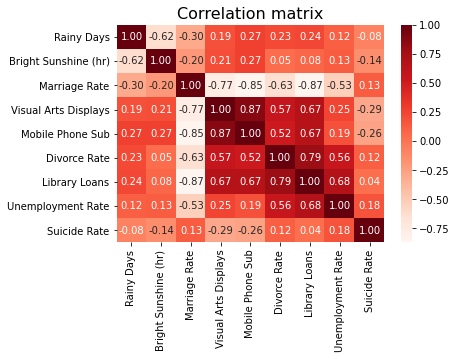

In [61]:
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Reds', annot = True, fmt=".2f", xticklabels=x_axis_labels, yticklabels=x_axis_labels).set_title('Correlation matrix', fontsize = 16)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42, oob_score=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [6]:
print('R^2 Training Score: {:.2f} \nR^2 OOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(regressor.score(X_train, y_train), 
                                                                                    regressor.oob_score_,
                                                                                    regressor.score(X_valid, y_valid)))

R^2 Training Score: 0.76 
R^2 OOB Score: -0.67 
R^2 Validation Score: -0.01


In [7]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [8]:
fe_imp = imp_df(X_train.columns, regressor.feature_importances_)
to_labels = ["Visual Arts Displays","Mobile Phone Sub","Unemployment Rate","Bright Sunshine (hr)","Divorce Rate","Rainy Days","Marriage Rate","Library Loans"]
fe_imp.at[0:7,"feature"] = to_labels

[Text(0.5, 0, 'Feature Importance'),
 Text(0, 0.5, 'Features'),
 Text(0.5, 1.0, 'Feature Importance')]

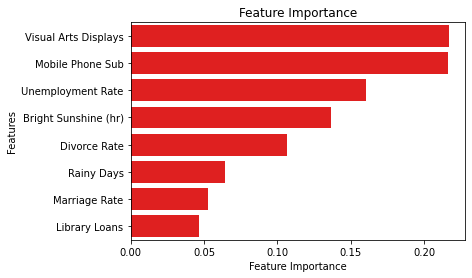

In [9]:
fe_imp.columns = ['feature', 'feature_importance']
ax = sns.barplot(x = 'feature_importance', y = 'feature', data = fe_imp, orient = 'h', color = 'red')
ax.set(xlabel="Feature Importance",ylabel="Features",title="Feature Importance")

In [10]:
import statsmodels.api as sm
T = sm.add_constant(X)
model = sm.OLS(y, T).fit()
predictions = model.predict(T) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.9177
Date:                Tue, 03 Nov 2020   Prob (F-statistic):              0.521
Time:                        01:11:55   Log-Likelihood:                 6.0693
No. Observations:                  30   AIC:                             5.861
Df Residuals:                      21   BIC:                             18.47
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.70